In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [53]:
df = pd.read_csv('housing.csv')

There is long tail distribution for median house value


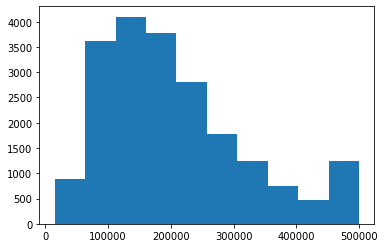

In [54]:
plt.hist(df['median_house_value'])
print('There is long tail distribution for median house value')

In [55]:
# Question 1
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [56]:
# Question 2
print("50th percentila of population:", df['population'].quantile(0.5))
print("The median of the population:", df['population'].median())

50th percentila of population: 1166.0
The median of the population: 1166.0


In [57]:
# dataset splitting
n = len(df)
n_train = int(n*0.6)
n_test = int(n*0.2)
n_val = int(n*0.2)

index = np.arange(n)
np.random.seed(42)
np.random.shuffle(index)

df_train = df.iloc[index[:n_train]]
df_test = df.iloc[index[n_train:n_train+n_test]]
df_val = df.iloc[index[n_train+n_test:n_train+n_test+n_val]]

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)

del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']

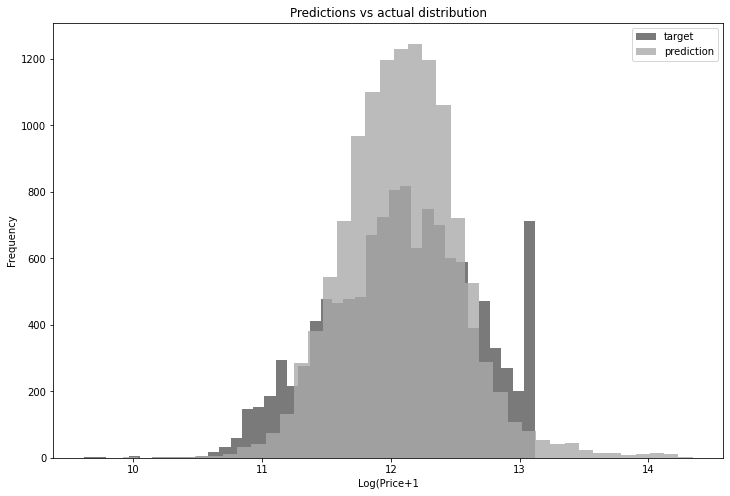

Prediction result filled with zero
train data RMSE: 0.34
validation data RMSE: 0.35
Prediction result filled with zero
train data RMSE: 0.34
validation data RMSE: 0.35


C:\Users\User\AppData\Local\Temp/ipykernel_12564/2684092741.py:44: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train = prepare_X(df_train, df_train.median())
C:\Users\User\AppData\Local\Temp/ipykernel_12564/2684092741.py:49: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_val = prepare_X(df_val, df_val.median())


In [62]:
# Question 3

base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
def prepare_X(df, fill_na_item):
    df_num = df[base]
    df_num = df_num.fillna(fill_na_item)
    X = df_num.values
    return X

X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)

# prediction using train data
y_pred = w0 + X_train.dot(w)

plt.figure(figsize=(12, 8))

plt.hist(y_train, label='target', color='#222222', alpha=0.6, bins=40)
plt.hist(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price+1')
plt.title('Predictions vs actual distribution')

plt.show()

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

print("Prediction result filled with zero")
print("train data RMSE:", round(rmse(y_train, y_pred), 2))

X_val = prepare_X(df_val, 0)
# prediction using validation data
y_pred = w0 + X_val.dot(w)
print("validation data RMSE:", round(rmse(y_val, y_pred), 2))

# fill in na with median
X_train = prepare_X(df_train, df_train.median())
y_pred = w0 + X_train.dot(w)
print("Prediction result filled with zero")
print("train data RMSE:", round(rmse(y_train, y_pred), 2))

X_val = prepare_X(df_val, df_val.median())
# prediction using validation data
y_pred = w0 + X_val.dot(w)
print("validation data RMSE:", round(rmse(y_val, y_pred), 2))

In [63]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [64]:
# Question 4
X_train = prepare_X(df_train, 0)
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    X_val = prepare_X(df_val, 0)
    # prediction using validation data
    y_pred = w0 + X_val.dot(w)
    print("regression:", r, "validation data RMSE:", round(rmse(y_val, y_pred), 2))

regression: 0 validation data RMSE: 0.35
regression: 1e-06 validation data RMSE: 0.35
regression: 0.0001 validation data RMSE: 0.35
regression: 0.001 validation data RMSE: 0.35
regression: 0.01 validation data RMSE: 0.35
regression: 0.1 validation data RMSE: 0.35
regression: 1 validation data RMSE: 0.36
regression: 5 validation data RMSE: 0.36
regression: 10 validation data RMSE: 0.36


In [67]:
# Question 5
score = list()
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    index = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(index)

    df_train = df.iloc[index[:n_train]]
    df_test = df.iloc[index[n_train:n_train+n_test]]
    df_val = df.iloc[index[n_train+n_test:n_train+n_test+n_val]]

    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)

    del df_train['median_house_value']
    del df_test['median_house_value']
    del df_val['median_house_value']

    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=0)

    X_val = prepare_X(df_val, 0)
    # prediction using validation data
    y_pred = w0 + X_val.dot(w)
    score.append(round(rmse(y_val, y_pred), 2))
standard_deviation = np.std(score)
print(round(standard_deviation, 3))

0.005


In [69]:
# Question 6
index = np.arange(n)
np.random.seed(9)
np.random.shuffle(index)

df_train = df.iloc[index[:n_train]]
df_test = df.iloc[index[n_train:n_train+n_test]]
df_val = df.iloc[index[n_train+n_test:n_train+n_test+n_val]]

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)

del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']

X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression_reg(X_train, y_train, r=0)

X_test = prepare_X(df_test, 0)
# prediction using validation data
y_pred = w0 + X_test.dot(w)
print("Test data RMSE:", round(rmse(y_test, y_pred), 2))

Test data RMSE: 0.34
